In [1]:
import os
import torchio as tio

from mbas.data.nifti import make_subject
from mbas.visualize.subject import plot_subject_with_label

%load_ext autoreload
%autoreload 2

import numpy as np
import pickle

2024-06-03 18:36:01.080241: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 18:36:01.103349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 18:36:01.476467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
nnunet_3d_lowres = "/home/bryan/expr/nnUNet_results/Dataset101_MBAS/nnUNetTrainer__nnUNetPlans__3d_lowres/fold_0/validation"
nnunet_encL_3d_fullres = "/home/bryan/expr/nnUNet_results/Dataset101_MBAS/nnUNetTrainer__nnUNetResEncUNetLPlans__3d_fullres/fold_0/validation"
nnunet_encM_3d_fullres_250 = "/home/bryan/expr/nnUNet_results/Dataset101_MBAS/nnUNetTrainer_250epochs__nnUNetResEncUNetMPlans__3d_fullres/fold_0/validation" 

In [9]:
subject = make_subject(
    "/home/bryan/data/MBAS/Training/MBAS_005",
    "train",
)

In [10]:
subject.add_image(
    tio.LabelMap(path=os.path.join(nnunet_3d_lowres, "MBAS_005.nii.gz"), name="3d_lowres"),
    "3d_lowres"
)
subject.add_image(
    tio.LabelMap(path=os.path.join(nnunet_encL_3d_fullres, "MBAS_005.nii.gz"), name="encL_3d_fullres"),
    "encL_3d_fullres"
)
subject.add_image(
    tio.LabelMap(path=os.path.join(nnunet_encM_3d_fullres_250, "MBAS_005.nii.gz"), name="encM_3d_fullres_250"),
    "encM_3d_fullres_250"
)

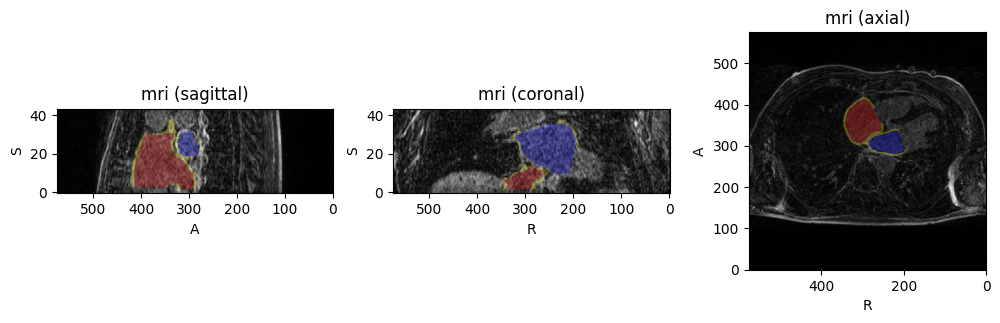

In [14]:
plot_subject_with_label(
    subject,
    show=True,
    add_metadata=False,
    add_segmentation_legend=False,
#     single_axis="axial",
    label_key="label",
    cmap="mbas",
    indices = (300, 300, 15),
    figsize=(10,3)
);

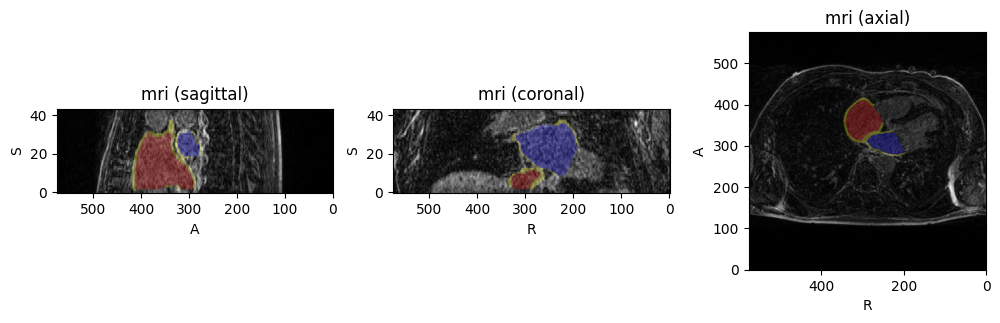

In [15]:
plot_subject_with_label(
    subject,
    show=True,
    add_metadata=False,
    add_segmentation_legend=False,
#     single_axis="axial",
    label_key="encL_3d_fullres",
    cmap="mbas",
    indices = (300, 300, 15),
    figsize=(10,3)
);

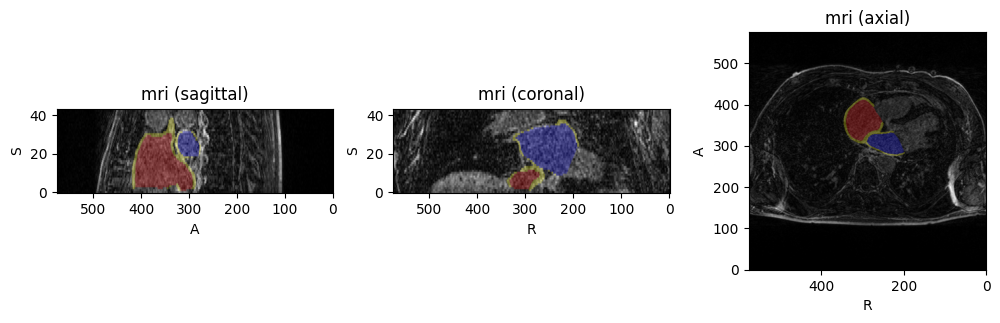

In [16]:
plot_subject_with_label(
    subject,
    show=True,
    add_metadata=False,
    add_segmentation_legend=False,
#     single_axis="axial",
    label_key="encM_3d_fullres_250",
    cmap="mbas",
    indices = (300, 300, 15),
    figsize=(10,3)
);

In [ ]:
path_npz = os.path.join(nnunet_validation_folder, "MBAS_005.npz")
image_npz = np.load(path_npz)

In [ ]:
image_npz.keys()

In [ ]:
image_npz["probabilities"].shape

In [ ]:
path_pkl = os.path.join(nnunet_validation_folder, "MBAS_005.pkl")
with open(path_pkl, "rb") as f:
    image_pkl = pickle.load(f)

In [ ]:
image_pkl.keys()